In [1]:
'''Import and first test with scikit'''

'Import and first test with scikit'

In [154]:
#modules
import csv
import collections
import numpy as np
from matplotlib import pyplot as plt
from mpl_toolkits import mplot3d
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.mixture import GMM
from sklearn.cross_validation import cross_val_score, KFold, cross_val_predict
from sklearn.metrics import accuracy_score
% matplotlib inline

In [186]:
#files
folder='D:/IA/Kaggle/Facebook/'
training=folder+'train.csv'
small=folder+'cell.csv'

In [187]:
#load data
with open(training, 'r',newline='') as csvfile:
    reader=csv.reader(csvfile)
    print(reader.__next__())
datab=np.loadtxt(small, delimiter=",",skiprows=1)
print(datab.shape)
print(datab[0])

['row_id', 'x', 'y', 'accuracy', 'time', 'place_id']
(70890, 6)
[  5.06000000e+02   7.45800000e-01   5.13320000e+00   1.48000000e+02
   4.42772000e+05   1.06003099e+09]


In [188]:
#prepare X and y
pos_time=4
X=np.concatenate((datab[:,[1,2,3]],datab[:,[pos_time]]%1440,(datab[:,[pos_time]]//1440)%7),axis=1)
y=np.ravel(datab[:,[5]]).astype('int64')
print(X.shape)
print(X[0])

(70890, 5)
[   0.7458    5.1332  148.      692.        6.    ]


In [189]:
# K NEAREST NEIGHBORS

In [190]:
#prepare the algorithm

#[x,y,acc,minute(1day), day]
weights=[1/2,1,0,1/18000,0]
knn = KNeighborsClassifier(n_neighbors=15, 
                           algorithm='auto',
                           weights='distance',#'uniform' or 'distance'
                           metric='minkowski',
                           p=2,
                           metric_params=None, 
                           leaf_size=30, 
                           n_jobs=1)

In [191]:
#cut train and test
test_size=1000

np.random.seed()
indices = np.random.permutation(len(X))
X_train = X[indices[:-test_size]]*weights
y_train = y[indices[:-test_size]]
X_test  = X[indices[-test_size:]]*weights
y_test  = y[indices[-test_size:]]

print((X*weights)[0])

[ 0.3729      5.1332      0.          0.03844444  0.        ]


In [192]:
#train and test
knn.fit(X_train, y_train) 
print(knn.score(X_test,y_test)*100,'%')

52.3 %


In [193]:
#cross validation (better than previous tests)
cvi=KFold(len(X), n_folds=5, shuffle=True, random_state=None)
scores=cross_val_score(knn, X*weights, y, scoring=None, cv=cvi, n_jobs=1, verbose=0, fit_params=None, pre_dispatch='2*n_jobs')
print("Accuracy: {0:.2f} (+/- {1:.2f}) %".format(scores.mean()*100, scores.std() * 200))

Accuracy: 53.09 (+/- 0.71) %


In [44]:
#get the predictions back
predicted = cross_val_predict(knn, X*weights, y, cv=cvi, n_jobs=1, verbose=0, fit_params=None, pre_dispatch='2*n_jobs')
print(accuracy_score(y, predicted))
right=y==predicted

0.487883576979


[6855713250, 3859388953, 9571480233, 4030068177, 5376644410]


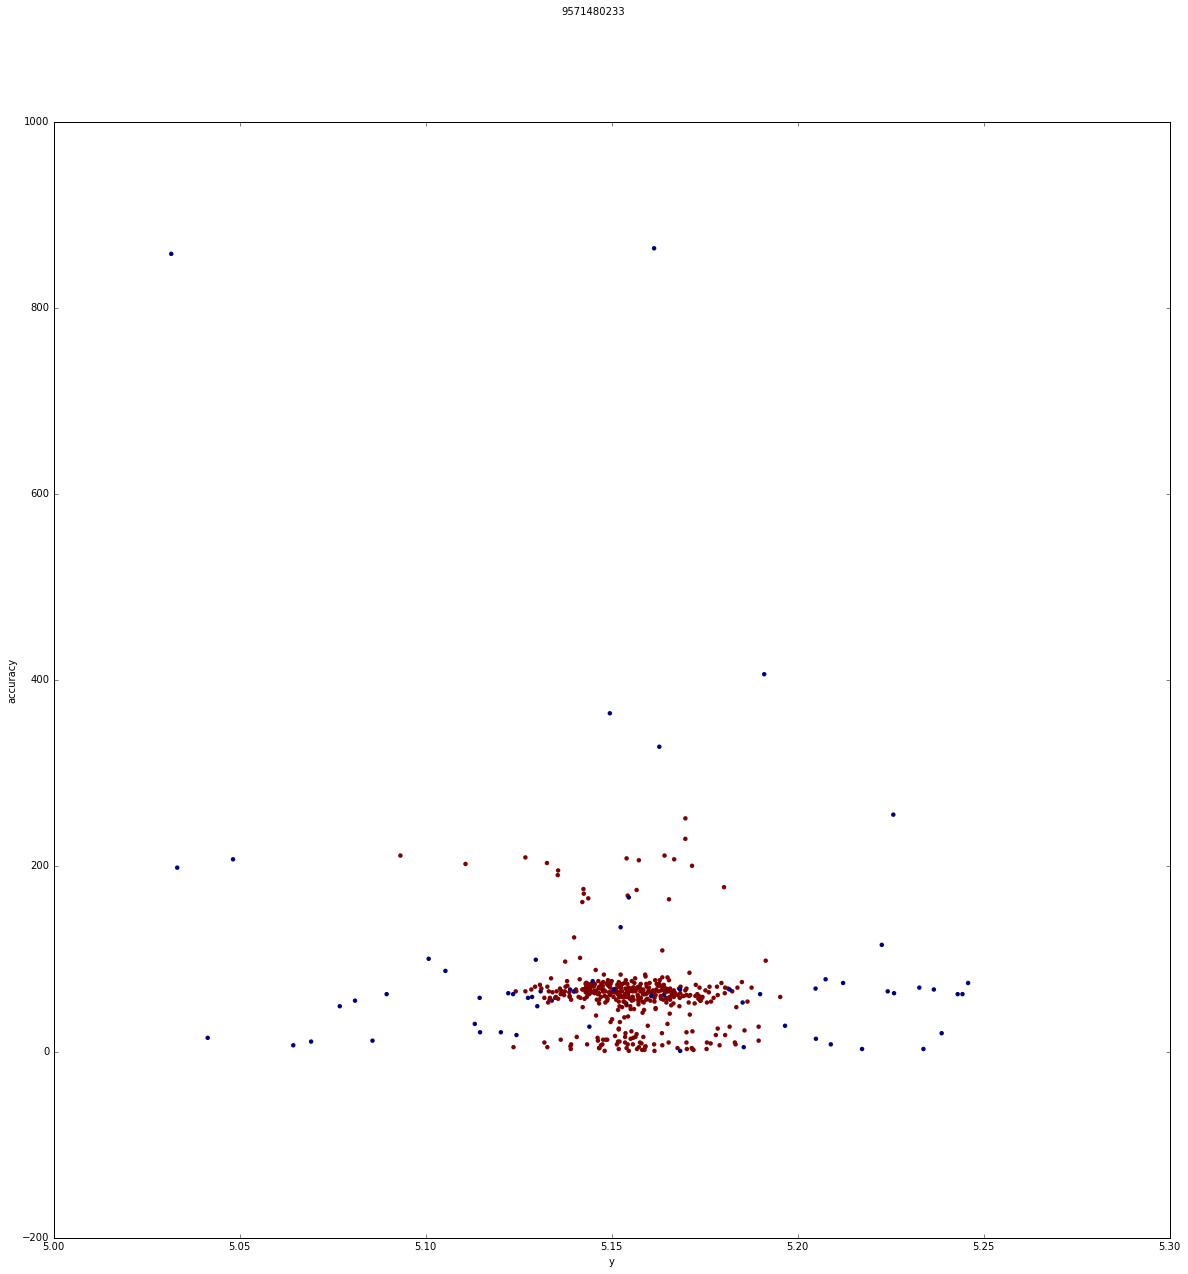

In [91]:
count=collections.defaultdict(int)
for vy in y:
    count[vy]+=1
biggest_group=[i for i in count if count[i] in sorted(count.values(),reverse=True)[:5]]
print(biggest_group)

mine = list(zip(*[(a[0],a[1],a[2],c) for a,b,c in zip(X,y,right) if b==biggest_group[4]]))

fig = plt.figure(figsize=(20, 20))
ax = fig.add_subplot(111)#, projection='3d')
ax.scatter(mine[0],mine[2],c=mine[3],linewidths=0)
fig.suptitle(biggest_group[2])
ax.set_xlabel('y')
ax.set_ylabel('accuracy')
#fig.savefig('red_crossya.png')

In [ ]:
# --------> 55% on test set

In [ ]:
# RANDOM FOREST

In [13]:
#prepare

#[x,y,acc,minute(1day), day]
weights=[1/2,1,0.0005,1/18000,0.0001]
rfc = RandomForestClassifier(n_estimators=4, 
                             criterion='gini', 
                             max_depth=10, 
                             min_samples_split=2, 
                             min_samples_leaf=1, 
                             min_weight_fraction_leaf=0.0, 
                             max_features='auto', 
                             max_leaf_nodes=None, 
                             bootstrap=True, 
                             oob_score=False, 
                             n_jobs=1, 
                             random_state=None, 
                             verbose=0, 
                             warm_start=False, 
                             class_weight=None)

In [15]:
#cut
test_size=1000

np.random.seed()
indices = np.random.permutation(len(X))
X_train = X[indices[:-test_size]]*weights
y_train = y[indices[:-test_size]]
X_test  = X[indices[-test_size:]]*weights
y_test  = y[indices[-test_size:]]

print((X*weights)[0])

[  2.52240000e+00   7.50890000e+00   8.00000000e-03   2.50000000e-03
   6.00000000e-04]


In [16]:
#train     
rfc.fit(X_train, y_train) 
print(rfc.score(X_test,y_test)*100,'%')

70.1 %


In [ ]:
# 52% with      !!!!! takes 5 minutes
weights=[1/2,1,0.0005,1/18000,0.0001]
rfc = RandomForestClassifier(n_estimators=10, 
                             criterion='gini', 
                             max_depth=10, 
                             min_samples_split=2, 
                             min_samples_leaf=1, 
                             min_weight_fraction_leaf=0.0, 
                             max_features='auto', 
                             max_leaf_nodes=None, 
                             bootstrap=True, 
                             oob_score=False, 
                             n_jobs=1, 
                             random_state=None, 
                             verbose=0, 
                             warm_start=False, 
                             class_weight=None)

In [106]:
# GAUSSIAN NAIVE BAYES

In [116]:
#prepare the algorithm

#[x,y,acc,minute(1day), day]
weights=[1/2,1,0,1/18000,0.0001]
gnb = GaussianNB()

In [132]:
#cut train and test
test_size=1000

np.random.seed()
indices = np.random.permutation(len(X))
X_train = X[indices[:-test_size]]
y_train = y[indices[:-test_size]]
X_test  = X[indices[-test_size:]]*weights
y_test  = y[indices[-test_size:]]

sample_weights=np.transpose(X_train[:,[2]])[0]
sample_weights*=sample_weights
X_train*=weights

print((X*weights)[0])

[ 2.5035  7.5736  0.      0.0565  0.    ]


In [142]:
#train and test
gnb.fit(X_train, y_train,sample_weights) 
print(gnb.score(X_test,y_test)*100,'%')

37.2 %


In [143]:
#cross validation (better than previous tests)
cvi=KFold(len(X), n_folds=5, shuffle=True, random_state=None)
predicted = cross_val_predict(gnb, X*weights, y, cv=cvi, n_jobs=1, verbose=0, fit_params=None, pre_dispatch='2*n_jobs')
right=y==predicted
print(sum(right)/len(right))

0.435861978138


In [145]:
# MULTINOMAIL NAIVE BAYES 

In [161]:
#prepare the algorithm

#[x,y,acc,minute(1day), day]
weights=[1/2,1,0,1/18000,0.0001]
mnb = BernoulliNB(alpha=1.0, binarize=0.0, fit_prior=True, class_prior=None)

In [162]:
#cut train and test
test_size=1000

np.random.seed()
indices = np.random.permutation(len(X))
X_train = X[indices[:-test_size]]
y_train = y[indices[:-test_size]]
X_test  = X[indices[-test_size:]]*weights
y_test  = y[indices[-test_size:]]

sample_weights=np.transpose(X_train[:,[2]])[0]
#sample_weights*=sample_weights
X_train*=weights

print((X*weights)[0])

[ 2.5035  7.5736  0.      0.0565  0.    ]


In [163]:
#train and test
mnb.fit(X_train, y_train,sample_weights) 
print(mnb.score(X_test,y_test)*100,'%')

0.1 %


D:\Soft\Anaconda3\lib\site-packages\sklearn\naive_bayes.py:785: RuntimeWarning: invalid value encountered in log
  neg_prob = np.log(1 - np.exp(self.feature_log_prob_))


In [160]:
#cross validation (better than previous tests)
cvi=KFold(len(X), n_folds=5, shuffle=True, random_state=None)
predicted = cross_val_predict(mnb, X*weights, y, cv=cvi, n_jobs=1, verbose=0, fit_params=None, pre_dispatch='2*n_jobs')
right=y==predicted
print(sum(right)/len(right))

0.0574213091005


In [8]:
# GRADIENT BOOSTING

In [30]:
#prepare

#[x,y,acc,minute(1day), day]
weights=[1/2,1,0.0005,1/18000,0.0001]
gbc=GradientBoostingClassifier(loss='deviance', 
                                learning_rate=1, 
                                n_estimators=10, 
                                subsample=1.0, 
                                min_samples_split=2, 
                                min_samples_leaf=1, 
                                min_weight_fraction_leaf=0.0, 
                                max_depth=3, 
                                init=None, 
                                random_state=None, 
                                max_features=None, 
                                verbose=0, 
                                max_leaf_nodes=None, 
                                warm_start=False, 
                                presort='auto')

In [28]:
#cut train and test
test_size=1000

np.random.seed()
indices = np.random.permutation(len(X))
X_train = X[indices[:-test_size]]*weights
y_train = y[indices[:-test_size]]
X_test  = X[indices[-test_size:]]*weights
y_test  = y[indices[-test_size:]]

print((X*weights)[0])

[  2.52240000e+00   7.50890000e+00   8.00000000e-03   2.50000000e-03
   6.00000000e-04]


In [29]:
#train and test
gbc.fit(X_train, y_train) 
print(gbc.score(X_test,y_test)*100,'%')

5.4 %


In [177]:
# K NN with extension over time

In [221]:
#prepare the algorithm

#[x,y,acc,minute(1day), day]
weights=[1/2,1,0.0005,1/18000,0.0001]
knn = KNeighborsClassifier(n_neighbors=15, 
                           algorithm='auto',
                           weights='distance',#'uniform' or 'distance'
                           metric='minkowski',
                           p=2,
                           metric_params=None, 
                           leaf_size=30, 
                           n_jobs=1)

In [222]:
#cut train and test
test_size=1000

np.random.seed()
indices = np.random.permutation(len(X))
X_train = X[indices[:-test_size]]*weights
y_train = y[indices[:-test_size]]
X_test  = X[indices[-test_size:]]*weights
y_test  = y[indices[-test_size:]]

print((X*weights)[0])
temp,ty=[],[]
for x,v in zip(X_train,y_train):
    if x[3]>1000:
        temp.append([x[0],x[1],x[2],x[3]-1440,x[4]])
        ty.append(v)
    if x[3]<400 :
        temp.append([x[0],x[1],x[2],x[3]+1440,x[4]])
        ty.append(v)

[  3.72900000e-01   5.13320000e+00   7.40000000e-02   3.84444444e-02
   6.00000000e-04]


In [223]:
temp=np.array(temp)
tot=np.concatenate((X_train,temp))
print(tot.shape)

(139780, 5)


In [224]:
X_train=tot
y_train=np.concatenate((y_train,np.array(ty)))
print(y_train.shape)

(139780,)


In [225]:
#train and test
knn.fit(X_train, y_train) 
print(knn.score(X_test,y_test)*100,'%')

55.3 %


In [185]:
# lets next in 02

In [ ]:
further :
    test different values
    implement in all square
    see where is the error :
        maybe not in the center
    compute size of square :
        with neighboring squares helping?
        each place id contained in one square?
    compute in several neighboring squares and take the best?
    classifications methods:
        real edges?
        Expectation maximization with the center?
    do script for automatic test: ----------------
        automatic results show:
            position
            what ids
    predict proba?
    see shape of output file
    group alone members and run another algo on them
    see in a group where the error come from
    use the fact that three answers are possible
    use accuracy as weights
    number of prediction for each
    ecartement moyen au sein d'un groupe
    see repartition of accuracy
    border for time!
    fir alone or grouped
    faire la variation croisée des paramètres sur un groupe pour changer la distance